In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_treinamento = pd.read_csv('../arquivos_csv/treinamento3.csv', low_memory=False)
df_teste = pd.read_csv('../arquivos_csv/teste3.csv', low_memory=False)


In [3]:
df_treinamento.columns

Index(['Unnamed: 0', 'Age', 'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'EMI', 'Qtd_contas_bancarias',
       'taxa_juros', 'dias_atraso', 'divida_restante',
       'utiliza_cartao_credito', 'Auto_Loan', 'Credit-Builder_Loan',
       'Debt_Consolidation_Loan', 'Home_Equity_Loan', 'Mortgage_Loan',
       'Not_Specified', 'Payday_Loan', 'Personal_Loan', 'Student_Loan'],
      dtype='object')

Maiores correlações entre atributos:
Credit_History_Age     Payment_of_Min_Amount    0.591460
Changed_Credit_Limit   Payment_of_Min_Amount    0.507779
Payment_of_Min_Amount  Credit_Mix               0.429547
Changed_Credit_Limit   Credit_History_Age       0.424507
Credit_Mix             Credit_History_Age       0.355111
dias_atraso            Payment_of_Min_Amount    0.350692
                       Credit_History_Age       0.334169
Age                    Payment_of_Min_Amount    0.268316
Credit_Mix             dias_atraso              0.259544
Credit-Builder_Loan    Credit_History_Age       0.243117
dtype: float64


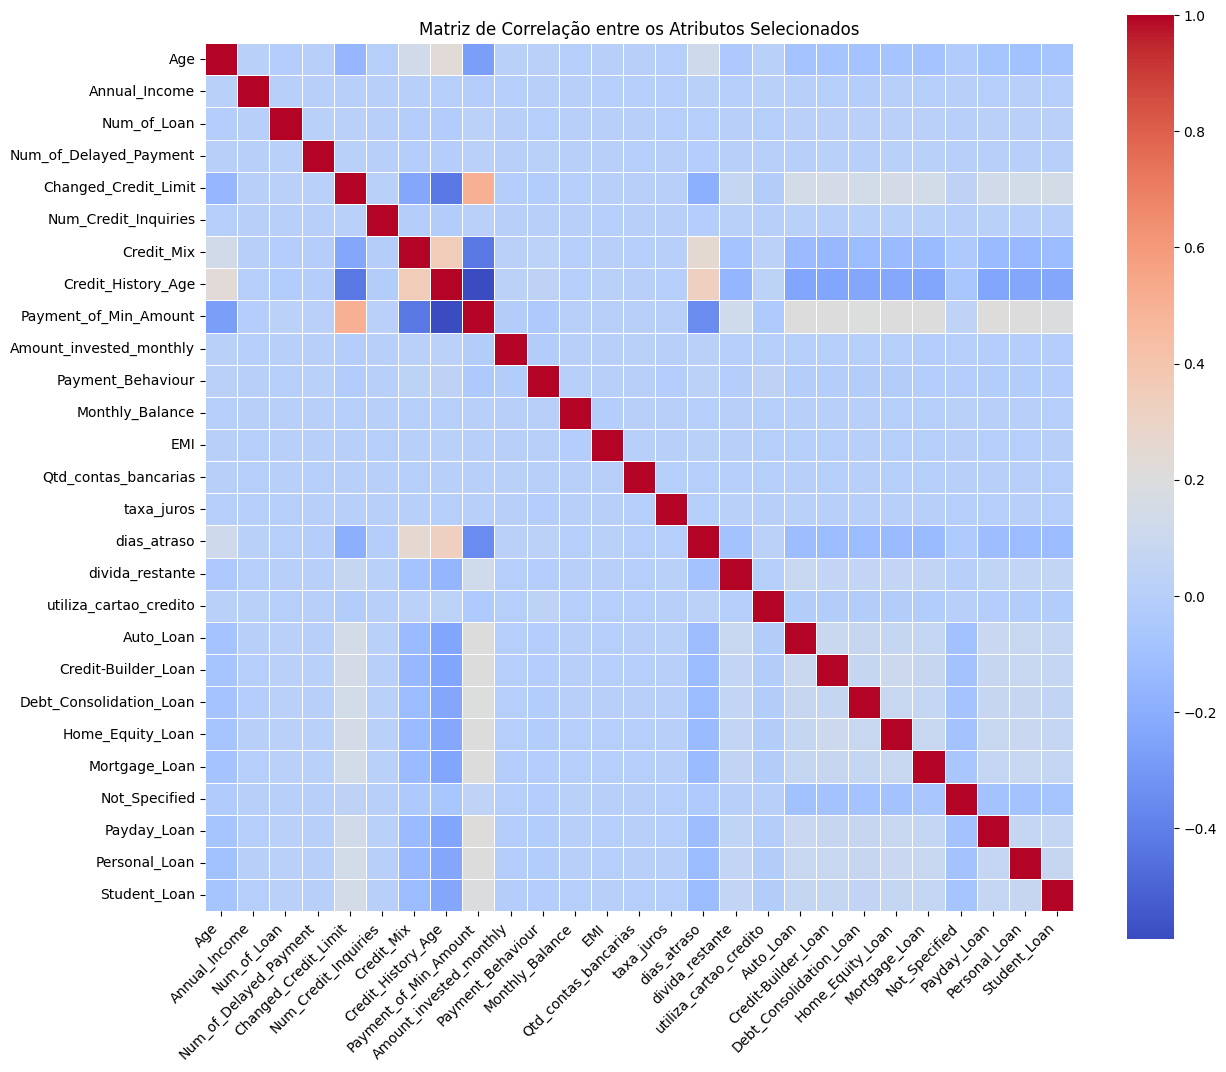

In [6]:
selected_columns = [
    'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'EMI',
    'Qtd_contas_bancarias', 'taxa_juros', 'dias_atraso', 'divida_restante', 'utiliza_cartao_credito',
    'Auto_Loan', 'Credit-Builder_Loan', 'Debt_Consolidation_Loan', 'Home_Equity_Loan', 
    'Mortgage_Loan', 'Not_Specified', 'Payday_Loan', 'Personal_Loan', 'Student_Loan'
]

correlation_matrix = df_treinamento[selected_columns].corr()
correlations_unstacked = correlation_matrix.unstack().abs().sort_values(ascending=False)
correlations_unstacked = correlations_unstacked[correlations_unstacked < 1.0].drop_duplicates()

top_correlations = correlations_unstacked.head(10)
print("Maiores correlações entre atributos:")
print(top_correlations)

# print("Matriz de Correlação entre os Atributos Selecionados:")
# print(correlation_matrix)

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Matriz de Correlação entre os Atributos Selecionados')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()